<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата <br>  <br> Генерация распределений </center>
---------------

Вы будете в шоке, но на самом деле R ориентирован на статитсику и всё что с ней связано! Пора бы поизучать его с этой точки зрения...  Подгружать пакеты для разных красивостей можно командой `library`. Вы должны знать об этом с первого курса...

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
     
# Если вы работаете в R-studio, вы можете избежать подгрузки пакетов ниже
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr') 
library("grid")  # Пакет для субплотов
options(repr.plot.width=4, repr.plot.height=3)

## 1. Генерим случайные величины 

Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сварить в R любую случайную величину, нужно знать четыре буквы: r, d, p и q. 

Посмотрим как это работает на примере **нормального распределения**. Того самого распределения, плотность которого выглядит как-то вот так: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

* `rnorm` эта команда сгенерирует выборку из нормального распределения
* `dnorm` эта команда вычислит значение плотности в указанной точке
* `pnorm` эта команда находит вероятность 
* `qnorm` эта команда находит квантили 

Аналогично можно работать со многими другими распределениями. Нужно только загуглить названия этих распределений. Например, команда `rchisq` всё ещё генерирует выборку, но уже из распределения хи-квадрат. 

Сгенерируем случайную величину из нормального распределения с математическим ожиданием $5$ и дисперсией $9$. 

In [2]:
x <- rnorm(1000, mean=5, sd=3)  # если дисперсия 9, то стандартное отклонение 3
x[10:20]

[1]  2.351077  5.534797  6.468988  7.122550  6.851653 -1.793655  8.139293
 [8]  3.800191  7.005418  4.589615  2.538975

Мы можем посчитать какие-нибудь характеристики для нашей случайной величины! 

In [3]:
mean(x) # среднее выборочное (при больших n похоже на математическое ожидание)

[1] 4.909839

In [4]:
var(x) # выборочная дисперсия

[1] 8.877323

In [5]:
sd(x) # выборочное стандартное отклонение

[1] 2.979484

In [6]:
median(x) # выборочная медиана

[1] 4.905332

Также мы можем построить гистограмму!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


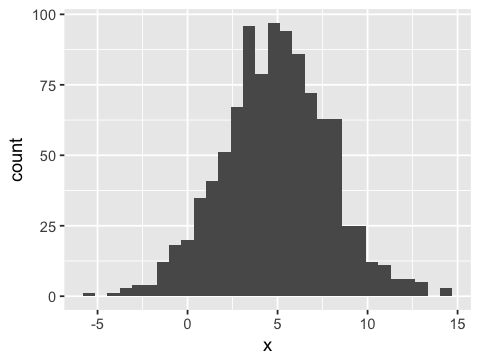

In [7]:
qplot(x) # гистограма 

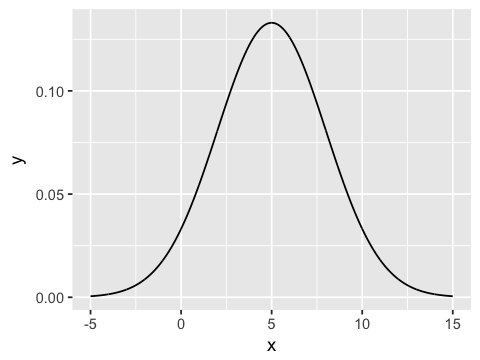

In [8]:
#построим функцию плотности
x <- seq(-5, 15, by=0.01)
y <- dnorm(x, mean=5, sd=3)
qplot(x, y, geom="line")

Найдём вероятность того, что нормально распределённая случайная величина с выбранными параметрами примет значение меньше $3$!

$$ P(X < 3) = \int_{-\infty}^3 f(x)dx = F(3)$$

In [9]:
pnorm(3, mean=5, sd=3)

[1] 0.2524925

А теперь найдём ещё одну вероятность! 

$$ P(4 < X < 9) = \int_4^9 f(x) dx = F(9) - F(4)$$

In [10]:
pnorm(9, mean=5, sd=3) - pnorm(4, mean=5, sd=3)

[1] 0.5393474

Для полноты картины осталось только найти какой-нибудь квантиль! Не будем забывать о том, что квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X < q) = \gamma$$

In [11]:
qnorm(0.7, mean=5, sd=3)

[1] 6.573202

Можно использовать R как весёлый калькулятор для поиска квантелей нормального распределения при проверке гипотез!

In [12]:
x <- c(0.95, 0.975, 0.995)
qnorm(x, mean = 0, sd = 1)

[1] 1.644854 1.959964 2.575829

Рано или поздно у вас вознкнет желание набить татуху с цифрами $1.64$ и $1.96$. Давайте попробуем получить те же самые квантили, но для распределения Стьюдента! 

In [13]:
x <- c(0.95, 0.975, 0.995)
qt(x, df=10)

[1] 1.812461 2.228139 3.169273

У распределения Стьюдента обычно при проверке гипотез используется разное количество степеней свободы. Тут какие-то конкретные значения на руку уже не набьёшь. Остался один вопрос на засыпку. А что сгенерирует команда `rnorm(20)`? 

In [14]:
rnorm(20)  # конечно выборку N(0,1)

[1] -0.272094287 -0.019314071  0.456690156  1.790013884  0.343430860
 [6] -0.472894294 -0.077768911 -0.356342788  0.931511315  0.285143679
[11] -0.076007648 -1.362479233 -0.003741978  0.365087628  1.881641525
[16] -0.227227271 -0.619692671 -1.019395480  0.662659735  1.186148761

## 2. Зачем это надо? 

Чтобы решать рельные проблемы! Например, с помощью R можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия страшных интегралов. Для этого надо лишь вспомнить [Закон Больших Чисел](https://ru.wikipedia.org/wiki/Закон_больших_чисел). Он говорит, что арифметическое среднее по большой выборке стремится по вероятности и почти наверное к математическому ожиданию. Поэтому мы просто сгенерируем большую выборку в миллион наблюдений:

In [1]:
n_obs <- 10^6
x <- rnorm(n_obs, mean = 5, sd = 3)
mean(1/x)

[1] 0.6826954

Вот и наше математическое ожидание! Попробуйте ради забавы найти его на досуге вручную. Или не пробуйте. Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково распределены $X_i \sim U[0;2]$:

In [16]:
n_obs <- 10^6
x_1 <- runif(n_obs, min = 0, max = 2)
x_2 <- runif(n_obs, min = 0, max = 2)
x_3 <- runif(n_obs, min = 0, max = 2)

success <- x_1 + x_2 + x_3^2 > 5
sum(success) / n_obs

[1] 0.14825

Здесь вектор success будет содержать значение `TRUE` там, где условие `x_1 + x_2 + x_3^2 > 5` выполнено, и `FALSE` там, где условие не выполнено. При сложении командой `sum()` каждое `TRUE` будет посчитано как единица, а каждое `FALSE` как ноль. Поэтому `sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3^2 > 5` выполнено.

И снова, на досуге попробуйте сделать это на бумажке своими руками, но лучше не надо. С такой же лёгкостью можно находить разные условные вероятности. Например, давайте найдём $P(X_1 + X_2 > 0.8 \mid X_3 < 0.1)$

In [17]:
uslovie <- x_3 < 0.1
uslovie[1:10]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [18]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
sum(uslovie)

[1] 49522

In [19]:
# ищем успех при условии
success <- x_1[uslovie] + x_2[uslovie] > 0.8

sum(success)/ n_obs

[1] 0.045634

## 3. Генерация выборок 

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

In [20]:
sample(1:10, size = 5)

[1] 3 8 6 9 2

Можно внести в это дело немного хаоса и сгенеровать ту же выборку, но с повторениями. 

In [21]:
sample(1:10, size = 5, replace = TRUE)

[1] 9 9 6 6 1

А ещё можно самостоятельно расставить вероятности событий. Давайте, например ссимулируем 10 подбрасываний неправильной монетки!

In [22]:
sample(c("Орёл", "Решка"), size = 10, replace = TRUE, prob = c(0.3, 0.7))

[1] "Решка" "Орёл"  "Решка" "Решка" "Орёл"  "Решка" "Орёл"  "Решка" "Орёл" 
[10] "Орёл"

А если упороться и ссимулировать огромное число наблюдений, то можно даже оценить вероятность выпадения решек. Хвала __Закону Больших Чисел__ за это!

In [23]:
x <-  sample(c("Орёл", "Решка"), size = 10^6, replace = TRUE, prob = c(0.3, 0.7))

sum(x == 'Орёл')/length(x)

[1] 0.300304

## 4. Зёрна

Если выполнить команду `rnorm(10, mean = 2, sd = 3)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :) Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [9]:
qrnorm(1, mean = 2, sd = 3)

[1] 6.112875

In [10]:
rnorm(1, mean = 2, sd = 3)

[1] 0.3059055

Угадайте, какие числа чаще всего используют для зёрен?

Многие алгоритмы в машинном обучении и эконометрике в какой-то степени основаны на случайности. Чтобы добиться воспроизводимых одинаковых результатов, нужно устанавливать зерно генерации. 

# Задачки

## 1. Задачка про булки

Каждый день Света съедает случайное количество булочек, которое распределено по Пуассону с параметром $10$. Логарифм затрат в рублях на каждую булочку распределён нормально $N(2,1)$. Ксюша каждый день съедает биномиальное количество булочек $Bin(8, 0.5)$. Затраты Ксюши на каждую булочку распределены равномерно на отрезке $[2;20]$. 

__а)__ Сколько в среднем Света тратит на булочки за день? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__б)__ Чему равна дисперсия дневных расходов Светы? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__в)__ Какова вероятность того, что за один день Света потратит больше денег, чем Ксюша? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__г)__ Какова условная вероятность того, что Света за день съела больше булочек, чем Ксюша, если известно, что Ксюша потратила больше денег? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

## 2. Задачка про багеты

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один заглот Удав Анатолий заглатывает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ заглотов. 

Найдите $E(N)$ и $Var(N)$. Как поменяются ответы, если багет имеет длину $2$ метра? 

Кстати говоря, эту задачку можно решить руками с помощью метода первого шага. Его мы разберём на второй паре. Правда для этого придётся выписать систему из двух уравниний с интегралами. В сборнике сложных задач по терверу, [культурном коде,](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) можно найти три разных решения этой задачки. Она там находится под номером $46$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

## 3. Задачка с контрольной по терверу :)

Для 20 участников соревнований, среди которых 8 российских, в гостинице забронировано 20 номеров. Из них 12 с видом на море. Участники соревнований наугад получают ключи от номернов. Найдите вероятность того, что номера с видом на море достанутся всем российским спортсменам.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

## 4. Задачка про лампочки

Таня сидит дома на самоизоляции уже третий месяц. Интернет отключили. Ей скучно. Она достала. из ящика $5$ лампочек, вкрутила их в люстру, поставила посреди комнаты стул и стала ждать, когда первая лампочка перегорит. Время работы лампочек, $T$, имеет экспоненциальное распределение с параметром $\lambda = 0.2$ минут.

__а)__ Какова вероятность того, что первая лапочка проработает больше $10$ минут? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__б)__ Чему равен для первой лампочки $95\%$ квантиль? Как проинтерпретировать это число? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__в)__ Пусть случайная велчина $X = \min(T_1, \ldots, T_5)$ - время до перегорания первой лампочки. Оцените: 

- $P(X > 10)$
- $P(X > 10 \mid T_1 > 5)$
- $E(X)$
- $E(X \mid T_1 > 5)$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

__г)__ Пусть случайная величина $Y = \max(T_1, \ldots, T_5)$ - время до перегорания последней лампочки. Оцените 

- $E(Y - X)$
- $P(Y > 2 X)$ 
- $Cov(X,Y)$,
- $Var(X), Var(Y)$, какая из дисперсий больше, почему?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ваш код

## Соблюдение авторских прав

* При написании первой части блокнота очень сильно (вплоть до копипасты) использовалась [первая глава](https://github.com/bdemeshev/r_manual_book/blob/master/03_statistics_and_more.Rmd) [учебника по языку R для начинающих от Демешева Б.Б.](https://bdemeshev.github.io/r_manual_book/)


## Почиташки 

*  Ещё один недописаный учебник с [разными распределениями и всяким таким в R](http://www.ievbras.ru/ecostat/Kiril/R/Biblio/R_rus/%C7%E0%F0%FF%E4%EE%E2%20%F7%E0%F1%F2%FC_2.pdf)
*  [Шпаргалка по ggplot2](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)